# <font color='maroon'>Home Learning Team 4</font>
Members: James Clay, Seloke Fabiao, Susan Mani

# <font color='maroon'>Assessment</font>
Given the following dataset, answer the questions that follow. The necessary libraries have been imported.

In [1]:
import matplotlib.pyplot as plt
from numpy import arange
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random as rnd

In [2]:
%matplotlib inline

In [3]:
# Importing smaller dataset due to kernel crashing
data = pd.read_csv('athletes2.csv', sep=',', low_memory=False)

### Question 1
Study the data. What is the size of the dataset?

In [4]:
# Display shape and size of dataset
r, c = data.shape
print ('Rows: ', r)
print ('Columns: ', c)
print ('Size: ', data.size)

Rows:  99999
Columns:  28
Size:  2799972


#### Question 1.1
Generate summary statistics of the data.

In [5]:
# Display summary of staistics of dataset
data.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,99999.000000,88149.000000,5.591700e+04,76262.000000,2.700400e+04,1.501300e+04,19969.000000,9.541000e+03,1.411400e+04,1.094000e+04,1.561200e+04,4.034700e+04,3.843300e+04,4.313900e+04,4.196700e+04,22771.000000
mean,248996.991400,32.117937,2.199641e+02,186.419003,1.225798e+03,1.745097e+03,235.231709,2.459749e+03,2.153703e+03,9.353103e+02,4.171511e+03,4.397188e+02,3.919149e+02,7.812855e+02,7.458652e+02,83.359931
std,200292.455162,7.310511,3.547434e+04,29.196966,8.842534e+04,9.690894e+04,3468.291638,8.592809e+04,1.225778e+05,8.026510e+04,1.503560e+05,4.177974e+04,4.278871e+04,5.711439e+04,5.805260e+04,6659.949693
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-60.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,-7.000000e+00,-5.000000
25%,58733.000000,27.000000,6.900000e+01,170.000000,1.870000e+02,4.990000e+02,134.000000,1.228000e+03,2.660000e+02,6.000000e+01,1.200000e+03,2.000000e+02,1.500000e+02,3.530000e+02,2.800000e+02,23.000000
50%,221271.000000,31.000000,7.000000e+01,185.000000,2.430000e+02,5.550000e+02,173.000000,1.453000e+03,3.140000e+02,6.600000e+01,1.305000e+03,2.300000e+02,1.750000e+02,4.050000e+02,3.250000e+02,34.000000
75%,456088.500000,37.000000,7.200000e+01,200.000000,3.300000e+02,6.310000e+02,227.000000,1.714000e+03,3.590000e+02,7.600000e+01,1.441000e+03,2.650000e+02,2.050000e+02,4.520000e+02,3.750000e+02,45.000000
max,626253.000000,125.000000,8.388607e+06,2215.000000,8.388607e+06,8.388607e+06,480480.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,1000000.000000


#### Question 1.2
Are the any missing values?  A simple strategy would be to remove rows with missing values. This can however reduce the size of the dataset. Another technique is to imput missing values with a sensible value like the mean.

For more on how to deal with missing values, see this blog entry: [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/).

In [6]:
# Investigate missing or null values in dataset
data.head(50)

# It is observed that missing values are not represented by 0, but rather by null

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN
5,6491,Jason Abney,NaN,NaN,NaN,Male,37.0,73.0,230.0,NaN,...,435.0,414.0,NaN,I eat strict Paleo|,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I typically ...,4+ years|,NaN
6,6610,Anthony Abeel,South Central,Get Lifted,Get Lifted CrossFit,Male,21.0,72.0,175.0,NaN,...,0.0,0.0,0.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I hav...,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,NaN
7,7268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7463,Tye Abell,NaN,NaN,NaN,Male,30.0,72.0,175.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8242,Ryan Achilles,NaN,NaN,NaN,Male,40.0,68.0,177.0,205.0,...,365.0,365.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I typically ...,2-4 years|,NaN


In [7]:
# Print a summary of the missing values
print(data.isnull().sum())

# It is observed that all fields with the exception of "athlete_id" contain missing values

athlete_id                0
name                  11850
region                20970
team                  48572
affiliate             23481
gender                11850
age                   11850
height                44082
weight                23737
fran                  72995
helen                 84986
grace                 80030
filthy50              90458
fgonebad              85885
run400                89059
run5k                 84387
candj                 59652
snatch                61566
deadlift              56860
backsq                58032
pullups               77228
eat                   66619
train                 63537
background            65526
experience            63818
schedule              65640
howlong               62540
retrieved_datetime    34015
dtype: int64


In [8]:
# It is determined that each field's missing values will be handled individually as follows:

# Field name:           Missing replacment:
# name                  "Unknown"
# region                "Unknown"
# team                  "Unknown"
# affiliate             "Unknown"
# gender                "Unknown"
# age                   mean
# height                mean
# weight                mean
# fran                  mean
# helen                 mean
# grace                 mean
# filthy50              mean
# fgonebad              mean
# run400                mean
# run5k                 mean
# candj                 mean
# snatch                mean
# deadlift              mean
# backsq                mean
# pullups               mean
# eat                   "Unknown"
# train                 "Unknown"
# background            "Unknown"
# experience            "Unknown"
# schedule              "Unknown"
# howlong               "Unknown"
# retrieved_datetime    "Unknown"

data.name.fillna("Unknown", inplace=True)
data.region.fillna("Unknown", inplace=True)
data.team.fillna("Unknown", inplace=True)
data.affiliate.fillna("Unknown", inplace=True)
data.gender.fillna("Unknown", inplace=True)
data.eat.fillna("Unknown", inplace=True)
data.train.fillna("Unknown", inplace=True)
data.background.fillna("Unknown", inplace=True)
data.experience.fillna("Unknown", inplace=True)
data.schedule.fillna("Unknown", inplace=True)
data.howlong.fillna("Unknown", inplace=True)
data.retrieved_datetime.fillna("Unknown", inplace=True)

data.age.fillna(data.age.mean(), inplace=True)
data.height.fillna(data.height.mean(), inplace=True)
data.weight.fillna(data.weight.mean(), inplace=True)
data.fran.fillna(data.fran.mean(), inplace=True)
data.helen.fillna(data.helen.mean(), inplace=True)
data.grace.fillna(data.grace.mean(), inplace=True)
data.filthy50.fillna(data.filthy50.mean(), inplace=True)
data.fgonebad.fillna(data.fgonebad.mean(), inplace=True)
data.run400.fillna(data.run400.mean(), inplace=True)
data.run5k.fillna(data.run5k.mean(), inplace=True)
data.candj.fillna(data.candj.mean(), inplace=True)
data.snatch.fillna(data.snatch.mean(), inplace=True)
data.deadlift.fillna(data.deadlift.mean(), inplace=True)
data.backsq.fillna(data.backsq.mean(), inplace=True)
data.pullups.fillna(data.pullups.mean(), inplace=True)

# Print confirmation that there are no longer missing values
print(data.isnull().sum())

athlete_id            0
name                  0
region                0
team                  0
affiliate             0
gender                0
age                   0
height                0
weight                0
fran                  0
helen                 0
grace                 0
filthy50              0
fgonebad              0
run400                0
run5k                 0
candj                 0
snatch                0
deadlift              0
backsq                0
pullups               0
eat                   0
train                 0
background            0
experience            0
schedule              0
howlong               0
retrieved_datetime    0
dtype: int64


### Question 2

Study the `height` column. What distribution does the data follow? 
Hint: Use a histogram or density plot to visualise the data.

In [9]:
# Display hieght column summary statistics
data['height'].describe()

count    9.999900e+04
mean     2.199641e+02
std      2.652691e+04
min      0.000000e+00
25%      7.000000e+01
50%      7.400000e+01
75%      2.199641e+02
max      8.388607e+06
Name: height, dtype: float64

In [10]:
# It can be seen that there are erroneous values in the height data column. 
# Height cannot be 0 and assuming the units are in inches, we can set an upper limit of 100. 
# Thus we set a lower limit of 20 and upper limit of 100 for data filtering:

filteredHeightData = data[(data['height'] > 20) & (data['height'] < 100)]
filteredHeightData.shape

(55467, 28)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


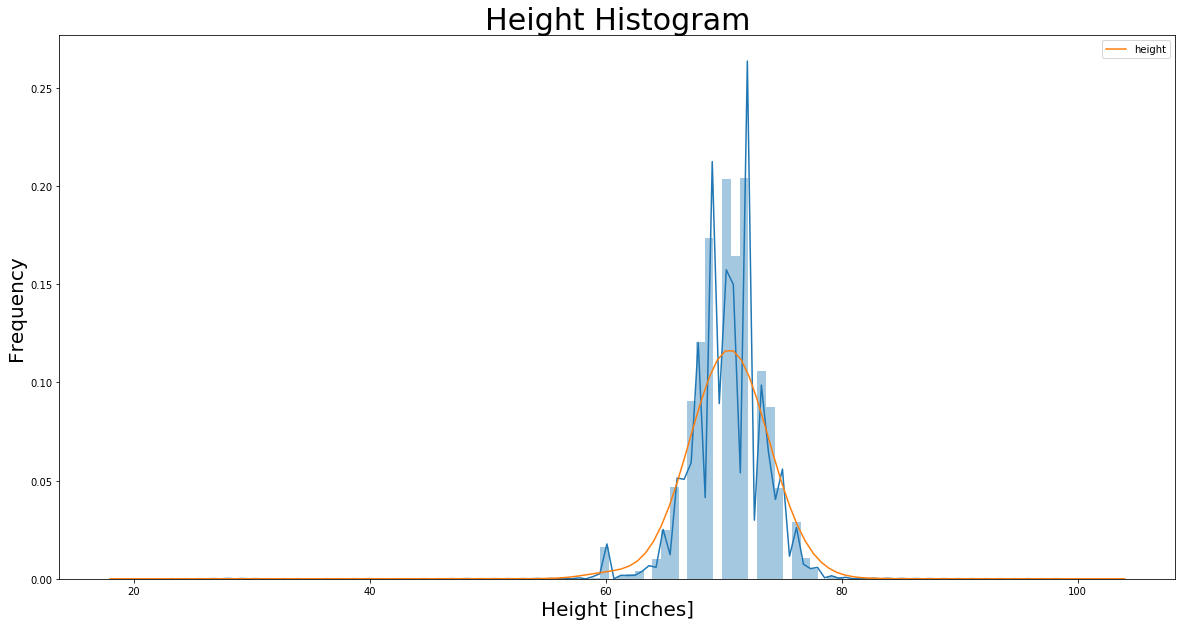

In [11]:
plt.figure(figsize=(20,10))

histo = sns.distplot(filteredHeightData['height'], bins=100, kde=True)
histo.axes.set_title("Height Histogram",fontsize=30)
histo.set_xlabel("Height [inches]",fontsize=20)
histo.set_ylabel("Frequency",fontsize=20)



sns.kdeplot(filteredHeightData['height'], bw=2)

In [12]:
# Based on the histogram and visual inspection, the distribution appears to be normal with a mean of approximately 70.

### Question 3
What is the average height?

In [13]:
print("Average Height: ", filteredHeightData.height.mean()," inches")

Average Height:  70.34382605873763  inches


### Question 4

Use simple random sampling to sample from the dataset. Choose a sample of 20000.

In [14]:
simpleSamples = filteredHeightData.sample(n=20000)
simpleSamples.shape

(20000, 28)

### Question 4

Use stratified sampling to sample from the dataset. Choose a sample of 20000.

In [15]:
stratifiedSamples = filteredHeightData.groupby('gender').apply(lambda x: x.sample(frac=0.37))
stratifiedSamples.shape

(20522, 28)

### Question 5
Compare simple random sampling and stratified random sampling. Compare the means generated by the two sampling techniques and discuss your observations below your code.

In [16]:
# Assuming the height column is to be considered for this analysis
simpleSamplesMean = simpleSamples.height.mean()
print("Simple Sample mean: ",simpleSamplesMean," inches")

Simple Sample mean:  70.3479  inches


Stratified sample mean

\begin{equation*}
 \bar x = \frac{1}{N}\sum_{h=1}^L N_h \bar x_h
\end{equation*}

where:

$\begin{equation*} \bar x \end{equation*}$ is the sample mean

$\begin{equation*} N \end{equation*}$ is the sum of all stratum sizes

$\begin{equation*} N_h \end{equation*}$ is the size of stratum $\begin{equation*} h \end{equation*}$

$\begin{equation*} \bar x_h \end{equation*}$ is the sample mean of stratum $\begin{equation*} h \end{equation*}$

In [17]:
maleStratumSize = len(stratifiedSamples[(stratifiedSamples['gender'] == 'Male')])
femaleStratumSize = len(stratifiedSamples[(stratifiedSamples['gender'] == 'Female')])

maleStratumMean = stratifiedSamples[(stratifiedSamples['gender'] == 'Male')].height.mean()
femaleStratumMean = stratifiedSamples[(stratifiedSamples['gender'] == 'Female')].height.mean()

stratifiedSamplesMean = 1/(maleStratumSize+femaleStratumSize)*((maleStratumSize*maleStratumMean+femaleStratumSize*femaleStratumMean))
    

print("Stratified Sample mean: ",stratifiedSamplesMean," inches")

Stratified Sample mean:  70.30708507942694  inches


In [18]:
# The sample means for the simple sample and stratified sample are very close. 
# This is due to the large sample size in comparsion to the population size.

### Question 6 

In  this question we are going to implement cluster sampling. Data is divided into clusters, if it isn't already divided into clusters, and then we use simple random sampling to select a number of clusters from the sample. From the group of selected clusters, we again use simple random sampling to select random data points. These now form our sample.  

Let's implement this procedure using some randomly generated data that we are going to group into clusters.

In [19]:
n_clusters = 10
data = stats.norm.rvs(loc=0,        # mean 0
                      scale=1,      # variance 1
                      size=100000,  # number of points
                      random_state=None)

data = pd.DataFrame({'var1': data})  # turn list into dataframe with heading var1

cluster = [rnd.randint(0,9) for c in range(100000)] # generate cluster numbers for grouping

n_col = pd.Series(cluster) # turn list into Series object
data['cluster'] = n_col.values
data.head()

,var1,cluster
0,1.319361,0
1,-0.571135,8
2,-0.171076,0
3,1.041801,4
4,-0.628180,5


Now that we've generated random data and placed the data into clusters, generate a sample from the *athletes* data using cluster sampling technique.

In [20]:
# Elect a number of clusters
n_clusters = 10

# Create a list of randomly selected clusters to assign to each dataset entry
cluster = [rnd.randint(0,9) for c in range(len(filteredHeightData))]

# Format the cluster list into a pandas series
n_col = pd.Series(cluster)

# Add the series as a new column to teh dataset
filteredHeightData['cluster'] = n_col.values

# View the dataset head
filteredHeightData.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime,cluster
0,2554,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.000000,1225.798104,...,305.000000,83.359931,Unknown,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,Unknown,6
1,3517,Derek Abdella,Unknown,Unknown,Unknown,Male,42.0,70.0,190.000000,1225.798104,...,745.865227,83.359931,Unknown,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,Unknown,6
3,5164,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,186.419003,211.000000,...,325.000000,25.000000,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,Unknown,2
4,5286,Bryce Abbey,Unknown,Unknown,Unknown,Male,32.0,65.0,149.000000,206.000000,...,325.000000,50.000000,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,Unknown,5
5,6491,Jason Abney,Unknown,Unknown,Unknown,Male,37.0,73.0,230.000000,1225.798104,...,414.000000,83.359931,I eat strict Paleo|,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I typically ...,4+ years|,Unknown,6


In [21]:
# For simplicity, 4 clusters will be randomly selected, and each will have a 5000 random smaple, totalling to 20000

# Initialise a list of sampled clusters
sampledClusters = []

# Initialise a dataframe to store the sampled data
clusteredSamples = pd.DataFrame()

# Loop code until 4 clusters have been sampled
while  len(sampledClusters) < 4:
    clusterAlreadySelected = False
    while clusterAlreadySelected == False:
        # Randomly select a cluster number
        selectedCluster = rnd.randint(0,(n_clusters-1))
        
        # Check that the cluster has not already been sampled in a previous iteration
        if selectedCluster not in sampledClusters:
            # Take a simple random sample from the selected cluster
            clusteredSamples = clusteredSamples.append(filteredHeightData[(filteredHeightData['cluster'] == selectedCluster)].sample(n=5000))
            # Append it to the sampled dataframe
            sampledClusters.append(selectedCluster)
            clusterAlreadySelected = True 

# View Statistical Summary of the cluster sampled data
clusteredSamples.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,cluster
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,222825.756300,32.18605,70.323150,187.139486,786.359740,1471.591937,226.376798,2306.370074,1698.580419,1.196452e+03,4.680401e+03,293.103878,249.785630,496.015899,442.540665,64.467360,4.500000
std,182775.204121,7.23626,3.113231,30.602038,537.732877,3797.836288,242.481047,552.982550,1063.895402,5.931209e+04,1.027173e+05,111.643741,114.861970,192.730109,207.322791,37.139597,3.201642
min,84.000000,13.00000,27.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.900000e+01,0.000000,0.000000,0.000000,-7.000000,0.000000,1.000000
25%,54774.000000,27.00000,69.000000,173.000000,253.750000,814.000000,220.000000,2459.749083,2153.702848,9.353103e+02,1.660000e+03,215.000000,165.000000,375.000000,305.000000,40.000000,1.750000
50%,182435.500000,31.00000,70.000000,186.419003,1225.798104,1745.097182,235.231709,2459.749083,2153.702848,9.353103e+02,4.171511e+03,255.000000,205.000000,435.000000,365.000000,83.359931,4.000000
75%,349535.750000,37.00000,72.000000,200.000000,1225.798104,1745.097182,235.231709,2459.749083,2153.702848,9.353103e+02,4.171511e+03,439.718839,391.914943,781.285496,745.865227,83.359931,6.750000
max,625521.000000,115.00000,84.000000,2215.000000,24900.000000,531255.000000,20760.000000,41704.000000,100000.000000,8.388607e+06,8.388607e+06,1500.000000,2225.000000,1225.000000,3000.000000,3000.000000,9.000000


<!-- Distribution fitting with scipy exercise given a dataset. Good references about El Nino dataset. I should find a climate dataset.

https://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524#16651524

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python -->